<a href="https://colab.research.google.com/github/tsvoronos/API202-students/blob/main/section-KP/section3-KP-answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## API-202M ABC SECTION #3
###### TF: Kelsey Pukelis

**I - INSTRUCTIONS**  

1. **Create a copy of this Jupyter notebook in your own drive by clicking `Copy to Drive` in the menubar (this is explained below in more detail below) - *if you do not do this your work will not be saved!***
    1. Remember to save your work frequently by pressing `command-S` or clicking `File > Save` in the menubar.
    1. We recommend completing this in Google Chrome.

## Load `R` libraries and data

**Please refer to Sheet 1 in this [R Cheat Sheet](https://bit.ly/HKS-R) which includes the commands you learned last semester in addition to a number of additional ones.**

The code cell below imports the R tidyverse. Make sure to run it before starting the problem set!

*Note: Click the "play" button that appears when you hover over a cell to run it. The first time you do this you may receive an alert that this notebook was not authored by Google. If so, click "Run anyway" to proceed.*

In [ ]:
library(tidyverse)

# PART I: Preferences for Receiving Redistribution: Explaining Welfare Participation



The purpose of this exercise is to understand:
* how to interpret a linear probability model
* the math regression is doing when we have all dummy variables on the right-hand side. 

In this exercise, we will replicate exploratory analysis I did for my own research using [General Social Survey (GSS)](https://gss.norc.org/About-The-GSS) data. 

The dataset `gss` includes the following variables: 
* `id_`: unique identifier for individuals in the dataset (You can ignore this.)
* `year`: The year of the survey, which is 1986 for all observations. (You can ignore this.)
* `getaid`: ever received welfare: "Have you personally ever received income from Aid to Families with Dependent Children (AFDC), General Assistance, Supplemental Security Income, or Food Stamps?"
* `welfare1`: "For each of the following statements, please tell me whether you strongly agree, agree, disagree, or strongly disagree with it. 'Welfare makes people work less than they would if there wasn't a welfare system.'"
* `wrkstat`: labor force status
* `age`: age in years
* `educ`: years of completed education
* `sex`: male or female
* `race`: White, Black, or Other race
* `incom16`: "Thinking about the time when you were 16 years old, compared with American families in general then, would you say your family income was--far below average, below average, average, above average, or far above average?"
* `income`: total family income
* `rincome`: respondent's earned income
* `partyid`: political party affiliation

In the code below, I recode some of these variables to make them easier to use in regession analysis, and save the new data as `gss_clean`. 

In [ ]:
gss <- read.csv('https://raw.githubusercontent.com/tsvoronos/API202-students/main/data/gss_short.csv')
head(gss)

,id_,year,getaid,welfare1,wrkstat,age,educ,sex,race,incom16,income,rincome,partyid
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1986,2. NO,3. DISAGREE,1. Working full time,28,14,1. MALE,1. White,5. FAR ABOVE AVERAGE,"11. $20,000 to $24,999",11. $20000 - 24999,"3. Independent (neither, no response)"
2,2,1986,2. NO,2. AGREE,7. Keeping house,54,16,2. FEMALE,1. White,5. FAR ABOVE AVERAGE,"12. $25,000 or more",.i,6. Strong republican
3,3,1986,1. YES,2. AGREE,1. Working full time,44,16,2. FEMALE,1. White,4. ABOVE AVERAGE,"12. $25,000 or more",6. $6000 TO 6999,0. Strong democrat
4,4,1986,2. NO,3. DISAGREE,5. Retired,77,14,2. FEMALE,2. Black,1. FAR BELOW AVERAGE,.r,.i,0. Strong democrat
5,5,1986,1. YES,2. AGREE,2. Working part time,44,14,2. FEMALE,2. Black,1. FAR BELOW AVERAGE,.d,.r,0. Strong democrat
6,6,1986,1. YES,1. STRONGLY AGREE,7. Keeping house,47,10,1. MALE,2. Black,3. AVERAGE,"5. $5,000 to $5,999",.i,1. Not very strong democrat


In [ ]:
# some pre-processing of the data 
gss_clean <- gss %>% 
  mutate(getaid = as.numeric(recode(getaid, 
        "2. NO" = "0", 
        "1. YES" = "1", 
        ".n" = NA_character_))) %>%
  mutate(welfare1_num = as.numeric(recode(welfare1,
        "4. STRONGLY DISAGREE" = "4", 
        "3. DISAGREE" = "3",
        "2. AGREE" = "2",
        "1. STRONGLY AGREE" = "1",
        ".n" = NA_character_,
        ".d" = NA_character_))) %>%
  relocate(welfare1_num, .after = welfare1) %>%
  mutate(working = as.numeric(recode(wrkstat,
        "1. Working full time" = "1",
        "2. Working part time" = "1",
        "3. With a job, but not at work because of temporary illness, vacation, strike" = "1",
        "4. Unemployed, laid off, looking for work" = "0",
        "5. Retired" = "0",
        "6. In school" = "0",
        "7. Keeping house" = "0",
        "8. Other" = "0"))) %>%
  relocate(working, .after = wrkstat) %>%
  mutate(age = as.numeric(recode(age,
        "89. 89 or older" = "89",
        ".n" = NA_character_))) %>%
  mutate(educ = as.numeric(recode(educ,
        "0. No formal schooling" = "0",
        ".n" = NA_character_))) %>%
  mutate(female = as.numeric(recode(sex,
        "1. MALE" = "0",
        "2. FEMALE" = "1"))) %>%
  relocate(female, .after = sex) %>%
  mutate(race_white = ifelse(race == "1. White",1,0)) %>%
  mutate(race_black = ifelse(race == "2. Black",1,0)) %>%
  mutate(race_other = ifelse(race == "3. Other",1,0)) %>%
  relocate(race_white, .after = race) %>%
  relocate(race_black, .after = race_white) %>%
  relocate(race_other, .after = race_black) %>%
  mutate(income_num = as.numeric(recode(income,
        '1. Under $1,000' = "1",
        '2. $1,000 to $2,999' = "2",
        '3. $3,000 to $3,999' = "3",
        '4. $4,000 to $4,999' = "4",
        '5. $5,000 to $5,999' = "5",
        '6. $6,000 to $6,999' = "6",
        '7. $7,000 to $7,999' = "7",
        '8. $8,000 to $9,999' = "8",
        '9. $10,000 to $14,999' = "9",
        '10. $15,000 to $19,999' = "10",
        '11. $20,000 to $24,999' = "11",
        '12. $25,000 or more' = "12",
        '.d' = NA_character_,
        '.n' = NA_character_,
        '.r' = NA_character_))) %>%
  relocate(income_num, .after = income) %>%
  mutate(party_short = recode(partyid,
        '0. Strong democrat' = "Democrat",
        '1. Not very strong democrat' = "Democrat",
        '2. Independent, close to democrat' = "Independent",
        '3. Independent (neither, no response)' = "Independent",
        '4. Independent, close to republican' = "Independent",
        '5. Not very strong republican' = "Republican",
        '6. Strong republican' = "Republican",
        '7. Other party' = "Independent",
        ".n" = NA_character_)) %>%
  relocate(party_short, .after = partyid) %>%
  mutate(party_dem = ifelse(party_short == "Democrat",1,0)) %>%
  mutate(party_ind = ifelse(party_short == "Independent",1,0)) %>%
  mutate(party_rep = ifelse(party_short == "Republican",1,0)) %>%
  relocate(party_dem, .after = party_short) %>%
  relocate(party_ind, .after = party_dem) %>%
  relocate(party_rep, .after = party_ind)

head(gss_clean)

,id_,year,getaid,welfare1,welfare1_num,wrkstat,working,age,educ,sex,⋯,race_other,incom16,income,income_num,rincome,partyid,party_short,party_dem,party_ind,party_rep
,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,1986,0,3. DISAGREE,3,1. Working full time,1,28,14,1. MALE,⋯,0,5. FAR ABOVE AVERAGE,"11. $20,000 to $24,999",11,11. $20000 - 24999,"3. Independent (neither, no response)",Independent,0,1,0
2,2,1986,0,2. AGREE,2,7. Keeping house,0,54,16,2. FEMALE,⋯,0,5. FAR ABOVE AVERAGE,"12. $25,000 or more",12,.i,6. Strong republican,Republican,0,0,1
3,3,1986,1,2. AGREE,2,1. Working full time,1,44,16,2. FEMALE,⋯,0,4. ABOVE AVERAGE,"12. $25,000 or more",12,6. $6000 TO 6999,0. Strong democrat,Democrat,1,0,0
4,4,1986,0,3. DISAGREE,3,5. Retired,0,77,14,2. FEMALE,⋯,0,1. FAR BELOW AVERAGE,.r,NA,.i,0. Strong democrat,Democrat,1,0,0
5,5,1986,1,2. AGREE,2,2. Working part time,1,44,14,2. FEMALE,⋯,0,1. FAR BELOW AVERAGE,.d,NA,.r,0. Strong democrat,Democrat,1,0,0
6,6,1986,1,1. STRONGLY AGREE,1,7. Keeping house,0,47,10,1. MALE,⋯,0,3. AVERAGE,"5. $5,000 to $5,999",5,.i,1. Not very strong democrat,Democrat,1,0,0


**1. Run a bivariate regression of receiving welfare on a dummy for agreeing with the statement, "Welfare makes people work less." (Note: You should create a dummy variable first, grouping together people who "agree" or "strongly agree" into the "agree" group.) Interpret the slope coefficient and intercept.** 

In [ ]:
# Your code here 

# START 

# create dummy var 
gss_clean <- gss_clean %>% 
  mutate(welfare1_agree = ifelse(welfare1_num <= 2,1,0)) 

# run bivariate regression
reg1 <- lm(getaid ~ welfare1_agree, data = gss_clean)
summary(reg1)

# END 


Call:
lm(formula = getaid ~ welfare1_agree, data = gss_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3594 -0.1607 -0.1607 -0.1607  0.8393 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.35945    0.02624  13.698  < 2e-16 ***
welfare1_agree -0.19876    0.02847  -6.982 4.43e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3865 on 1441 degrees of freedom
  (27 observations deleted due to missingness)
Multiple R-squared:  0.03272,	Adjusted R-squared:  0.03205 
F-statistic: 48.75 on 1 and 1441 DF,  p-value: 4.429e-12


Your Answer Here 

#### START 

Among people who disagree with the statement "welfare makes people work less", 35.9 percent report receiving welfare. 

Agreeing with the statement "Welfare makes people work less" is associated with a 19.9 percentage point decrease in the likelihood of receiving welfare, on average, compared to people who disagree with the statement. 

#### END 

**2. Beliefs about welfare programs are very political, so we should probably account for respondents' party. Control for political party by including the dummies for "Republican", "Democrat", and/or "Indepedent" in a multivariate regression. Which dummies did you include in the regression and why? Say what each of the coefficients is measuring. Interpret the coefficient on agreeing with the statement, and briefly note how the coefficient changed compared to the bivariate regression.**

In [ ]:
# Your code here 

# START 

# Dummies for political party were already created

# reg where omitted group is independents 
reg2 <- lm(getaid ~ welfare1_agree + party_rep + party_dem, data = gss_clean)
summary(reg2)

# END 


Call:
lm(formula = getaid ~ welfare1_agree + party_rep + party_dem, 
    data = gss_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37873 -0.19560 -0.18750 -0.08308  0.91692 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.370632   0.029199  12.693  < 2e-16 ***
welfare1_agree -0.183131   0.028486  -6.429 1.75e-10 ***
party_rep      -0.104417   0.026429  -3.951 8.17e-05 ***
party_dem       0.008097   0.023633   0.343    0.732    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3842 on 1436 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.04728,	Adjusted R-squared:  0.04529 
F-statistic: 23.75 on 3 and 1436 DF,  p-value: 5.262e-15


Your Answer HERE 

#### START 

I included dummies for "Republican" and "Democrat", omitting the "Independent" group. I chose **Independents** as the reference group so they could serve as a "neutral" reference point to the other two groups. (You could have included any of the 2 groups, but not 3 to avoid multicollinearity issues.)

Among **Independents** who **disagree** with the statement "welfare makes people work less", 37.1 percent report receiving welfare. 

Relative to **Independents** who **disagree** with the statement, **Republicans** who **disagree** with the statement are 10.4 percentage points less likely to report receiving welfare, on average. This coefficient is statistically significant. 

Relative to **Independents** who **disagree** with the statement, **Democrats** who **disagree** with the statement are 0.1 percentage points more likely to report receiving welfare, on average. This is basically a "statistical zero". 

Agreeing with the statement "Welfare makes people work less" is associated with a 18.3 percentage point decrease in the likelihood of receiving welfare, on average across people of **all political parties**, controlling for party. 

This coefficient is statistically significant and similar in magnitude to the estimate from the bivariate regression. This suggests that although people from different political parties have different "baselines" for their likelihood of taking up welfare programs (i.e. they have different intercepts), the belief that "welfare makes people work less" still explains variation in welfare program participation. Note that this regression specification implicitly *assumes* that the relationship between beliefs and welfare participation is the **same** across the three party groups. 

#### END 

**Let's practice running the same regression, now using factors in R instead of using dummy variables.**

Recall the following coding example from the lecture appendix:

```
NLS <- NLS %>% mutate(grad = as_factor(case_when(educ < 12 ~ "Less than HS",
                                                  educ >= 12 & educ < 16 ~ "HS",
                                                  educ >= 16 ~ "College")))
```
If we already had a variable called `educ_group` that took on (character) values `"Less than HS","HS","College"`, then we could create a factor variable using the following code:
```
NLS <- NLS %>% mutate(grad = as_factor(educ_group))
```

**3. Turn the political party variable `party_short` into a factor variable, and run the same regression as before. Note which group that R automatically omitted.**

In [ ]:
# Your code here

# START 

# generate factor variable for political party
gss_clean <- gss_clean %>%
  mutate(party_short_factor = as_factor(party_short))

# run regression using this factor variable (instead of dummy vars)
reg2B <- lm(getaid ~ welfare1_agree + party_short_factor, data = gss_clean)
summary(reg2B)

# END 


Call:
lm(formula = getaid ~ welfare1_agree + party_short_factor, data = gss_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37873 -0.19560 -0.18750 -0.08308  0.91692 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.370632   0.029199  12.693  < 2e-16 ***
welfare1_agree               -0.183131   0.028486  -6.429 1.75e-10 ***
party_short_factorRepublican -0.104417   0.026429  -3.951 8.17e-05 ***
party_short_factorDemocrat    0.008097   0.023633   0.343    0.732    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3842 on 1436 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.04728,	Adjusted R-squared:  0.04529 
F-statistic: 23.75 on 3 and 1436 DF,  p-value: 5.262e-15


Your Answer Here

#### START 

When using the factor variable R automatically omits the Independent group. So our regression results are exact the same as above. 

#### END 

If we already created a factor variable called `grad`, we could set the reference group by listing in first using the `relevel` command:

```
NLS$grad <- relevel(NLS$grad, "Less than HS", "HS", "College")
```
So this code sets `"Less than HS"` as the reference group for the factor variable `grad`.

**4. Using a factor variable, set the reference group to Republicans and run the regression again. Briefly discuss how the interpretation of the regression changes.**

In [ ]:
# Your code here 

# START 

# relevel factor variable to make Republican the reference group
gss_clean$party_short_factor <- relevel(gss_clean$party_short_factor,"Republican","Independent","Democrat")

# run regression again
reg2C <- lm(getaid ~ welfare1_agree + party_short_factor, data = gss_clean)
summary(reg2C)

# END 


Call:
lm(formula = getaid ~ welfare1_agree + party_short_factor, data = gss_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37873 -0.19560 -0.18750 -0.08308  0.91692 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    0.26622    0.03279   8.119 9.98e-16 ***
welfare1_agree                -0.18313    0.02849  -6.429 1.75e-10 ***
party_short_factorIndependent  0.10442    0.02643   3.951 8.17e-05 ***
party_short_factorDemocrat     0.11251    0.02563   4.389 1.22e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3842 on 1436 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.04728,	Adjusted R-squared:  0.04529 
F-statistic: 23.75 on 3 and 1436 DF,  p-value: 5.262e-15


Your Answer Here 

#### START 

All of the following holds *among people who disagree*: 
Now, the intercept reflects the average for Republicans (who disagree), the coefficient on Democrat tells us the difference in means between Democrats and Republicans (who disagree, which is positive), and the coefficient on Independents tells us the difference in means between Independents and Republicans (who disagree, which is positive). 

Note that changing the reference group to Republicans allows us to test for the difference in means between Democrats and Republicans (which we couldn't do when Independents were the reference group), as well as the difference in means between Independents and Republicans. 

#### END 

**Suppose we want to test the null hypothesis that the relationship between agreeing with the statement and receiving welfare is the same across the three political groups.** 

**5. To start, simply calculate the means of the welfare participation variable for 6 groups: Independents who disagree, Republicans who disagree, Democrats who disagree, Independents who agree, Republicans who agree, and Democrats who agree.**

In [ ]:
# Your code here 

# START 

means_table <- gss_clean %>% 
  group_by(party_short,factor(welfare1_agree)) %>%
    summarize(getaid_mean = mean(getaid,na.rm = TRUE),
              n = n()) %>%
    arrange(getaid_mean, descending = TRUE)
means_table
# END 

`summarise()` has grouped output by 'party_short'. You can override using the
`.groups` argument.


party_short,factor(welfare1_agree),getaid_mean,n
<chr>,<fct>,<dbl>,<int>
NA,1,0.00000000,3
Republican,1,0.08092486,349
Independent,1,0.18472906,408
Democrat,1,0.19957537,474
Independent,NA,0.25000000,9
Republican,0,0.29032258,31
Democrat,0,0.36000000,100
Independent,0,0.38372093,87
Democrat,NA,0.42857143,7


Your Answer Here

#### START 
Here is a summary of the means of the 6 groups: 

*    8.1 percent of **Republicans** who **agree** report receiving welfare
*   18.5 percent of **Independents** who **agree** report receiving welfare
*   20.0 percent of **Democrats** who **agree** report receiving welfare
*   29.0 percent of **Republicans** who **disagree** report receiving welfare
*   36.0 percent of **Democrats** who **disagree** report receiving welfare
*   38.4 percent of **Independents** who **disagree** report receiving welfare

#### END 

**Suppose now we actually want to *test* the null hypothesis that the relationship between agreeing with the statement and receiving welfare is the same across the three political groups. Someone suggests running the following regression:**

$$
getaid_i = \beta_0 + \beta_1 Republican_i + \beta_2 Democrat_i + \beta_3  welfare1.agree_i  + \beta_4 welfare1.agree * Republican_i + \beta_5 welfare1.agree * Democrat_i + u_i
$$


**6. Fill in the following table to show how the coefficients in the regression relate to the 6 means that you just calculated. What is the omitted group in the regression? Which coefficient(s) are relevant for testing the null hypothesis? Can we test the null hypothesis that all the effect is the same for *all* three groups?**

$$
\begin{array}{|l|l|l|}
\hline \\
Party & Agree/Disagree & Coefficient(s) \\
\hline \\
Independents & Disagree & \\
\hline \\
Republicans & Disagree & \\
\hline \\
Democrats & Disagree & \\
\hline \\
Independents & Agree & \\
\hline \\
Republicans & Agree & \\
\hline \\
Democrats & Agree & \\
\hline \\
\end{array}
$$


Your Answer Here 

#### START 

Independents are the omitted reference group. The coefficients of interests are $\beta_4$ and $\beta_5$. To test the null hypothesis, we would like to see if they are different from zero. This test would tell us if the relationship between agreeing with the statement and receiving welfare (the "slope" coefficient) is the same between Independents and Republicans ($\beta_4$) or is the same between Independents and Democrats ($\beta_5$). Note that this regression does NOT allow us to test whether the relationship is the same between Republicans and Democrats. 

$$
\begin{array}{|l|l|l|}
\hline \\
Party & Agree/Disagree & Coefficient(s) \\
\hline \\
Independents & Disagree & \beta_0 \\
\hline \\
Republicans & Disagree & \beta_0 + \beta_1 \\
\hline \\
Democrats & Disagree & \beta_0 + \beta_2 \\
\hline \\
Independents & Agree & \beta_0 + \beta_3 \\
\hline \\
Republicans & Agree & \beta_0 + \beta_1 + \beta_3 + \beta_4 \\
\hline \\
Democrats & Agree & \beta_0 + \beta_1 + \beta_3 + \beta_5 \\
\hline \\
\end{array}
$$


#### END 

**7. Now create the interaction terms in the dataset and run this regression.**

In [ ]:
# Your code here

# START

# create interaction terms
gss_clean <- gss_clean %>%
  mutate(welfare1_agree_X_rep = welfare1_agree * party_rep) %>%
  mutate(welfare1_agree_X_dem = welfare1_agree * party_dem)

# regression with interaction terms
reg3 <- lm(getaid ~ party_rep + party_dem + welfare1_agree + welfare1_agree_X_rep + welfare1_agree_X_dem, data = gss_clean)
summary(reg3)

# END 


Call:
lm(formula = getaid ~ party_rep + party_dem + welfare1_agree + 
    welfare1_agree_X_rep + welfare1_agree_X_dem, data = gss_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38372 -0.19958 -0.18473 -0.08092  0.91908 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.38372    0.04145   9.257  < 2e-16 ***
party_rep            -0.09340    0.08053  -1.160    0.246    
party_dem            -0.02372    0.05653  -0.420    0.675    
welfare1_agree       -0.19899    0.04563  -4.361 1.39e-05 ***
welfare1_agree_X_rep -0.01041    0.08530  -0.122    0.903    
welfare1_agree_X_dem  0.03857    0.06224   0.620    0.536    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3844 on 1434 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.04764,	Adjusted R-squared:  0.04432 
F-statistic: 14.35 on 5 and 1434 DF,  p-value: 9.915e-14


**8. Confirm that you can recover the means for each of the 6 groups by adding together different coefficients as indicated in your table above. What does this tell you about what regression is doing when we are working with all dummy variables on the right hand side?**

In [ ]:
# Your code here (optional)

# START

# Note: you could do this by hand instead of using code 

# extracts coefficients from regression results, and stores them in a vector
betas <- data.frame(summary(reg3)$coefficients[,1])

# creates one object per coefficient 
beta_0 <- betas[1,]
beta_1 <- betas[2,]
beta_2 <- betas[3,]
beta_3 <- betas[4,]
beta_4 <- betas[5,]
beta_5 <- betas[6,]

# redo the math from the table above
"Indepedents, disagree"
beta_0 
"Republicans, disagree"
beta_0 + beta_1
"Democrats, disagree"
beta_0 + beta_2
"Indepedents, agree"
beta_0 + beta_3
"Republicans, agree"
beta_0 + beta_1 + beta_3 + beta_4
"Democrats, agree"
beta_0 + beta_2 + beta_3 + beta_5

# compare to means table 
means_table

# END 

[1] "Indepedents, disagree"

[1] 0.3837209

[1] "Republicans, disagree"

[1] 0.2903226

[1] "Democrats, disagree"

[1] 0.36

[1] "Indepedents, agree"

[1] 0.1847291

[1] "Republicans, agree"

[1] 0.08092486

[1] "Democrats, agree"

[1] 0.1995754

party_short,factor(welfare1_agree),getaid_mean,n
<chr>,<fct>,<dbl>,<int>
NA,1,0.00000000,3
Republican,1,0.08092486,349
Independent,1,0.18472906,408
Democrat,1,0.19957537,474
Independent,NA,0.25000000,9
Republican,0,0.29032258,31
Democrat,0,0.36000000,100
Independent,0,0.38372093,87
Democrat,NA,0.42857143,7


Your Answer Here 

#### START

Wow! By adding together coefficients from the regressions, we can *exactly* recover each of the group means that we calculated before. This shows that, when all the variables on the right hand side are dummy variables, regression is just a fancy average-making machine. 

Note: We refer to a regression that includes all possible combinations of dummy variable interactions as "fully saturated."

#### END 

**Bonus: Run a regression controlling for other factors that you think might affect welfare participation. How does this change the estimate on the "agree" coefficient?**

In [ ]:
# generate age squared variable 
gss_clean <- gss_clean %>%
  mutate(age_sq = age*age)

reg4 <- lm(getaid ~ welfare1_agree + party_rep + party_dem + working + age + age_sq + educ + female + race_black + race_other + as.factor(income_num), data = gss_clean)
summary(reg4)


Call:
lm(formula = getaid ~ welfare1_agree + party_rep + party_dem + 
    working + age + age_sq + educ + female + race_black + race_other + 
    as.factor(income_num), data = gss_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81378 -0.20739 -0.09273  0.05927  1.04967 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.626e-01  1.283e-01   3.604 0.000325 ***
welfare1_agree          -1.029e-01  2.766e-02  -3.719 0.000209 ***
party_rep               -3.947e-02  2.596e-02  -1.521 0.128557    
party_dem               -9.556e-03  2.338e-02  -0.409 0.682818    
working                 -1.139e-01  2.552e-02  -4.465 8.72e-06 ***
age                      2.036e-02  3.634e-03   5.602 2.58e-08 ***
age_sq                  -2.667e-04  3.729e-05  -7.152 1.42e-12 ***
educ                    -1.373e-02  3.634e-03  -3.777 0.000166 ***
female                   5.312e-02  2.050e-02   2.592 0.009663 ** 
race_black             

Your Answer Here 

#### START 

Controlling for these other characteristics reduces the magnitude of the coefficient on the agree variable. (Especially noteworthy are the fact that working people are less likely to report receiving welfare, all else constant; richer people are less likely to report receiving welfare, all else constant; and black individuals are more likely to report receiving, all else constant.)

However, it is still the case that the relationship between agreeing with the statement "Welfare makes people work less" and reported welfare receipt is negative, statistically significant, and quite large in magnitude. 


#### END 

**Bonus. Create a table showing results from your regressions: the bivariate regression, the regression controling for political party, the regression with interaction terms, and perhaps the regression including other controls.** 

First, run the script below installing the package modelsummary (this may take a minute or so to install).

In [ ]:
check_installed <- require(modelsummary)
if(check_installed==F){
  install.packages("modelsummary")
  require(modelsummary)
}

In the code snippet below, `fit1`, `fit2`, and `fit3` is the regression outputs you saved in previous code, `Name of Outcome Variable` is what you would like to show up on the top of each column, and `var1` and `var2` are the name of two independent variables included in the regression (e.g. party_rep). Note that you can and should include all the variables that you used in the models you ran in the `coef_map` line.
```
  modelsummary(list("Name Outcome Variable" = fit1,"Name Outcome Variable" = fit2, "Name Outcome Variable" = fit3),
  stars=T,
  coef_map = c("(Intercept)" = "Constant","var1" = "Name of var1", "var2" = "Name of var2"),
 title = "Add Here the Title of the Table",
  gof_omit = 'IC|Log',
  output="jupyter")

  ```

In [ ]:
# Your code here 

# START 
 modelsummary(list("Received welfare" = reg1,"Received welfare" = reg2, "Received welfare" = reg3,"Received welfare" = reg4),
  stars=T,
  coef_map = c("(Intercept)" = "Constant",
              "party_rep" = "Republican",
              "party_dem" = "Democrat",
              "welfare1_agree" = "Agrees w/ 'welfare makes people work less'",
              "welfare1_agree_X_rep" = "Agrees & Republican",
              "welfare1_agree_X_dem" = "Agrees & Democrat"),
 title = "Beliefs about welfare and participation",
  gof_omit = 'IC|Log',
  output="jupyter")
print("Note: this table is a little strange because the interpretation of the coefficient changes across regression specifications")
print("Note: The fourth column does not show coefficients for all demographics, to save space.")
  
# END 

,Received welfare,Received welfare,Received welfare,Received welfare
Constant,0.359***,0.371***,0.384***,0.463***
,(0.026),(0.029),(0.041),(0.128)
Republican,,−0.104***,−0.093,−0.039
,,(0.026),(0.081),(0.026)
Democrat,,0.008,−0.024,−0.010
,,(0.024),(0.057),(0.023)
Agrees w/ 'welfare makes people work less',−0.199***,−0.183***,−0.199***,−0.103***
,(0.028),(0.028),(0.046),(0.028)
Agrees & Republican,,,−0.010,
,,,(0.085),


[1] "Note: this table is a little strange because the interpretation of the coefficient changes across regression specifications"
[1] "Note: The fourth column does not show coefficients for all demographics, to save space."


**9. Finally, can you reject the null hypothesis that the relationship between  agreeing with the statement and receiving welfare is the same across the political groups?**

Your Answer Here 

#### START 

The coefficients on the interaction terms are not statistically significant. Therefore, we cannot reject the null hypothesis that the relationship between beliefs about welfare (i.e. agreeing with the statement) and welfare receipt is the same between Republicans and Independent or is the same between Democrats and Independents. (Remember, when Independents is the reference group, we can't perform a statistical test of where the the null hypothesis that the relationship between beliefs about welfare and welfare receipt is the same between Democrats and Republicans.)

#### END 

**10. Come up with a variable in the dataset other than political party that you think may affect the relationship between beliefs about welfare and welfare participation. Create interaction term(s) and run a regression that allows you to test your hypothesis. Compare to a regression where you include that variable as a control, but without an interaction term. Interpret your results.**

In [ ]:
# Your code here 

# START 

# create interaction term: working X agreeing
gss_clean <- gss_clean %>% 
  mutate(welfare1_agree_X_working = welfare1_agree * working)

# run regression, with interaction
reg5 <- lm(getaid ~ working + welfare1_agree + welfare1_agree_X_working, data = gss_clean)
summary(reg5)

# run regression, without interaction (This just controls for work status)
reg6 <- lm(getaid ~ working + welfare1_agree, data = gss_clean)
summary(reg6)

# table summarizing results (optional)
 modelsummary(list("Received welfare" = reg1,"Received welfare" = reg6, "Received welfare" = reg5),
  stars=T,
  coef_map = c("(Intercept)" = "Constant",
              "working" = "Working",
              "welfare1_agree" = "Agrees w/ 'welfare makes people work less'",
              "welfare1_agree_X_working" = "Agrees & Working"),
 title = "Beliefs about welfare and participation",
  gof_omit = 'IC|Log',
  output="jupyter")
# END 


Call:
lm(formula = getaid ~ working + welfare1_agree + welfare1_agree_X_working, 
    data = gss_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4943 -0.2016 -0.1333 -0.1333  0.8667 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.49425    0.04108  12.031  < 2e-16 ***
working                  -0.22502    0.05308  -4.239 2.38e-05 ***
welfare1_agree           -0.29262    0.04457  -6.565 7.25e-11 ***
welfare1_agree_X_working  0.15673    0.05759   2.722  0.00657 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3832 on 1439 degrees of freedom
  (27 observations deleted due to missingness)
Multiple R-squared:  0.05075,	Adjusted R-squared:  0.04877 
F-statistic: 25.64 on 3 and 1439 DF,  p-value: 3.681e-16



Call:
lm(formula = getaid ~ working + welfare1_agree, data = gss_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4145 -0.2158 -0.1239 -0.1239  0.8761 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.41449    0.02885  14.366  < 2e-16 ***
working        -0.09187    0.02063  -4.453 9.13e-06 ***
welfare1_agree -0.19872    0.02828  -7.026 3.27e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.384 on 1440 degrees of freedom
  (27 observations deleted due to missingness)
Multiple R-squared:  0.04586,	Adjusted R-squared:  0.04453 
F-statistic: 34.61 on 2 and 1440 DF,  p-value: 2.092e-15


,Received welfare,Received welfare,Received welfare
Constant,0.359***,0.414***,0.494***
,(0.026),(0.029),(0.041)
Working,,−0.092***,−0.225***
,,(0.021),(0.053)
Agrees w/ 'welfare makes people work less',−0.199***,−0.199***,−0.293***
,(0.028),(0.028),(0.045)
Agrees & Working,,,0.157**
,,,(0.058)
Num.Obs.,1443,1443,1443
R2,0.033,0.046,0.051


Your Answer Here 

#### START 

Since the beliefs are about work, we may think that work status may affect this relationship. So I created an interaction between agreeing with the statement and a dummy variable for working (or not), which was already in the dataset. 

Intercept: 
* Among people who are **not working** and **disagree**, 49.4 percent report receiving welfare. 

$\beta_1$:
* Compared to people who are not working and disagree, people who are **working** and **disagree** are 22.5 percentage points *less* likely to report receiving welfare, on average. 
* In other words, among people who disagree, people who work are 22.5 percentage points *less* likely receive welfare compared to people who don't work, on average. 

$\beta_2$:
* Compared to people who are not working and disagree, people who are **not working** and **agree** are 29.2 percentage points *less* likely to report receiving welfare, on average. 
* In other words, among people who are not working, people who agree are 29.2 percentage points *less* likely receive welfare compared to people who disagree, on average. 
* In other words, among people who are not working, agreeing is associated with a 29.2 percentage point decrease in the likelihood of receiving welfare, on average. 

$\beta_3$:
* **Agreeing** is associated with a 15.7 percentage point *increase* in welfare participation among people who are **working**, compared to the relationship among people who are **not working**. 
* The fact that the coefficient on the interaction ($\beta_3$) is statistically significant suggests that the relationship between beliefs about welfare and welfare participation *is different* between people who are working and not. 
* In this case, it means the relationship between agreeing and welfare participation is *less negative* among people working compared to those not working. (To help with this interpretation, see the visualization below.)

#### END 

#### START

$$
getaid_i = \beta_0 + \beta_1 Working_i + \beta_2 welfare1.agree_i + \beta_3 welfare1.agree * Working_i + u_i
$$

$$
\begin{array}{|l|l|l|}
\hline \\
Working & Agree/Disagree & Coefficient(s) \\
\hline \\
Not.working & Disagree & \beta_0 \\
\hline \\
Working & Disagree & \beta_0 + \beta_1 \\
\hline \\
Not.working & Agree & \beta_0 + \beta_2 \\
\hline \\
Working & Agree & \beta_0 + \beta_1 + \beta_2 + \beta_3 \\
\hline \\
\end{array}
$$


#### END 

Warning message:
“Removed 27 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 27 rows containing missing values (`geom_point()`).”


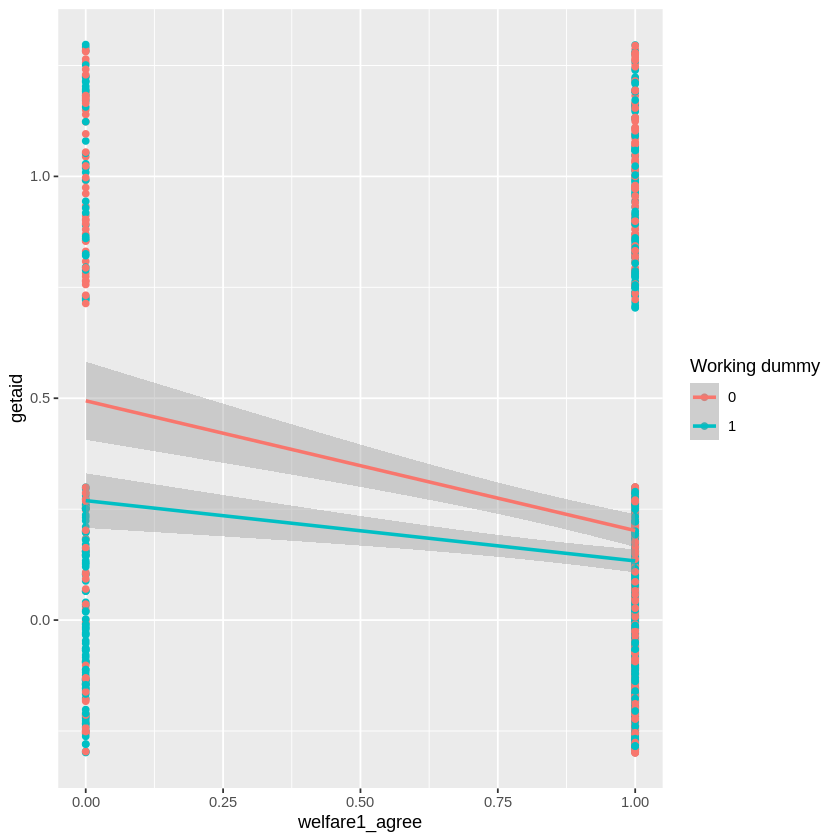

In [ ]:
# START 

# visualization 
ggplot(data = gss_clean,aes(x = welfare1_agree,y = getaid,color = as.factor(working))) + 
 geom_point(position = position_jitter(w = 0, h = 0.3)) +
    geom_smooth(method = "lm", formula = y ~ x, se = TRUE) + 
      scale_color_discrete(name = "Working dummy")
    
# END 

#### START 
Note that the slopes appear to be quite different from each other, which coincides with us rejecting the null hypothesis that $\beta_3 = 0$.

#### END 

**Bonus. Describe what this exercise overall tells us about the causal relationship between beliefs about welfare and participation in welfare programs.**

Your answer here

#### START

Throughout this exercise, we found that agreeing with the statement, “welfare makes people work less” is significantly negatively associated with welfare receipt, even when controlling for demographic characteristics.

This suggests that internal attitudes about the relationship between benefit receipt and work *could be* key to influencing an individual’s decision to participate in the social safety net. However, this analysis demonstrates a mere association. It could be possible that individuals who receive government assistance justify their decision to themselves *ex post*. In other words, it could be that individuals first participate in welfare programs, and then change their beliefs about the relationship between welfare and work (in particular, realizing that welfare did not make them work less). 

It remains to be tested whether altering individual narratives about welfare receipt and work (assuming we could do such a thing) would causally encourage safety net program participation. 


#### END 